<a href="https://colab.research.google.com/github/lucascerfig/fci-cienciadedados/blob/main/notebooks/aula3_24_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3 - Limpeza e Preparação de Dados

**Nome**: Luiz Gabriel Profirio Mendes
**RA**: 10382703

#### Instalação das Bibliotecas

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset do repositório no GitHub

In [59]:
# URL do arquivo CSV no GitHub
url = 'https://raw.githubusercontent.com/lucascerfig/fci-cienciadedados/main/datasets/aula3_vendas_kbelo.csv'

# Carregar o dataset para um dataframe
df = pd.read_csv(url)

Visualizando as primeiras linhas do dataframe

In [60]:
df.head()

,ID da Transacao,Item,Quantidade,Valor Unitario,Total do Pedido,Forma de Pagamento,Local,Data da Transacao
0,TXN_1961373,PastelDoce,2,12.0,24.0,Credito,Viagem,2023-09-08
1,TXN_4977031,PastelSalgado,4,13.5,54.0,Dinheiro,NoLocal,2023-05-16
2,TXN_4271903,Batata,4,10.0,NaN,Credito,NoLocal,2023-07-19
3,TXN_7034554,DogCompleto,2,15.0,30.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,PastelDoce,2,12.0,24.0,Pix,NoLocal,2023-06-11


Logo na visualização dos primeiros itens do dataset já notamos que algumas colunas apresentam valores inesperados (ERROR, UNKNOWN) ou faltantes...

Vamos explorar melhor esse dataset para entender com que tipos de problemas estaremos lidando.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID da Transacao     10200 non-null  object
 1   Item                9857 non-null   object
 2   Quantidade          10059 non-null  object
 3   Valor Unitario      9681 non-null   object
 4   Total do Pedido     9722 non-null   object
 5   Forma de Pagamento  7564 non-null   object
 6   Local               6870 non-null   object
 7   Data da Transacao   10034 non-null  object
dtypes: object(8)
memory usage: 637.6+ KB


A primeira coisa que notamos é que todas as colunas estão com o tipo "object", até mesmo as colunas que deveriam ser numéricas como Quantidade, Valor Unitario, Total do Pedido.

Para entender os tipos de valores que estão ocorrendo em cada uma das colunas, vamos utilizar do método .value_counts()

In [62]:
for col in df.columns:
  print(f"Value counts para a coluna '{col}':")
  value_counts = df[col].value_counts()
  display(value_counts)
  print("\n")

Value counts para a coluna 'ID da Transacao':


ID da Transacao
TXN_3633955    2
TXN_3324387    2
TXN_7805115    2
TXN_1827212    2
TXN_5333966    2
              ..
TXN_9933628    1
TXN_6796890    1
TXN_4583012    1
TXN_8567525    1
TXN_9226047    1
Name: count, Length: 10000, dtype: int64



Value counts para a coluna 'Item':


Item
Suco             1196
PastelDoce       1181
DogCompleto      1175
PastelSalgado    1161
DogSimples       1156
Refrigerante     1118
Batata           1114
Hamburguer       1107
UNKNOWN           351
ERROR             298
Name: count, dtype: int64



Value counts para a coluna 'Quantidade':


Quantidade
5          2051
2          2011
4          1907
3          1883
1          1863
UNKNOWN     173
ERROR       171
Name: count, dtype: int64



Value counts para a coluna 'Valor Unitario':


Valor Unitario
12.0       2214
9.0        1118
15.0       1104
13.5       1052
8.0        1023
1.5        1018
10.0       1013
ERROR       257
UNKNOWN     253
4.0          93
3.0          89
5.0          62
6.0          55
20.0         50
2.0          42
1.0          39
16.0         36
24.0         35
18.0         30
7.5          30
4.5          27
25.0         24
30.0         17
Name: count, dtype: int64



Value counts para a coluna 'Total do Pedido':


Total do Pedido
60.0       718
36.0       682
24.0       640
12.0       481
27.0       468
40.0       438
45.0       422
30.0       421
48.0       420
20.0       281
UNKNOWN    262
15.0       261
18.0       260
3.0        251
75.0       250
ERROR      248
9.0        237
6.0        236
67.5       231
10.0       230
7.5        227
16.0       225
8.0        219
32.0       214
13.5       210
50.0       210
54.0       208
4.5        207
40.5       190
1.5        184
4.0         25
2.0         21
5.0         17
72.0        15
80.0        15
100.0       15
22.5        12
1.0         11
90.0        11
25.0        10
120.0       10
64.0         8
150.0        6
96.0         6
125.0        5
37.5         4
Name: count, dtype: int64



Value counts para a coluna 'Forma de Pagamento':


Forma de Pagamento
Credito     2330
Pix         2327
Dinheiro    2300
ERROR        310
UNKNOWN      297
Name: count, dtype: int64



Value counts para a coluna 'Local':


Local
NoLocal    3081
Viagem     3078
ERROR       363
UNKNOWN     348
Name: count, dtype: int64



Value counts para a coluna 'Data da Transacao':


Data da Transacao
UNKNOWN       163
ERROR         142
2023-03-13     42
2023-06-16     41
2023-02-06     41
             ... 
2023-07-22     15
2023-11-24     15
2023-07-30     15
2023-03-11     14
2023-02-17     14
Name: count, Length: 367, dtype: int64

Com base nas tabelas, podemos ver que existem colunas com valores nulos e tipos de dados com ruído como 'ERROR' ou 'UNKNOWN'.

Vamos tratar esses erros, padronizando todos esses casos de ruído para um valor nulo

In [63]:
df.replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)

Valores nulos por coluna:


ID da Transacao          0
Item                   992
Quantidade             485
Valor Unitario        1029
Total do Pedido        988
Forma de Pagamento    3243
Local                 4041
Data da Transacao      471
dtype: int64

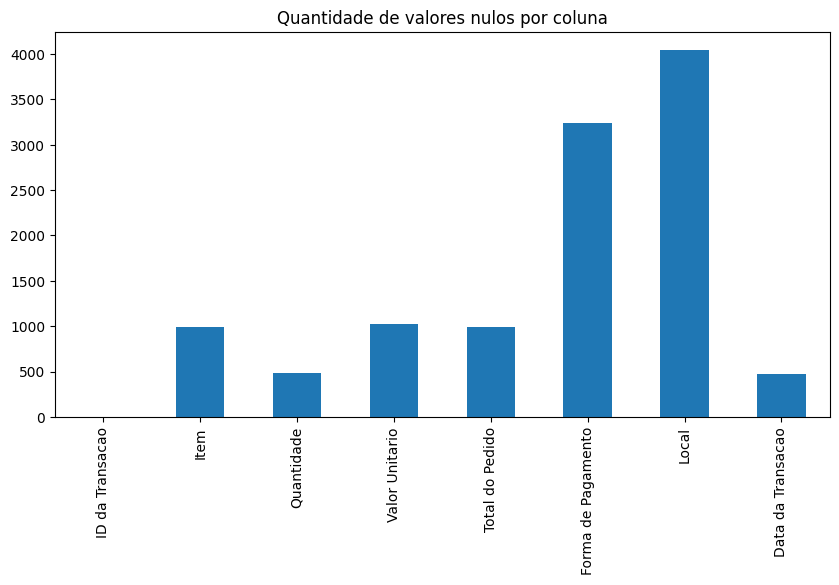

In [64]:
# vamos contar novamente quantos valore nulos existem em cada coluna
print("Valores nulos por coluna:")
display(df.isnull().sum())


plt.figure(figsize=(10, 5))
df.isnull().sum().plot(kind='bar')
plt.title('Quantidade de valores nulos por coluna')
plt.show()

Agora que padronizamos os casos de 'ERROR' e 'UNKNOWN' como valores faltantes, podemos ajustar o tipo das colunas:

In [65]:
df['Quantidade'] = pd.to_numeric(df['Quantidade'])
df['Valor Unitario'] = pd.to_numeric(df['Valor Unitario'])
df['Total do Pedido'] = pd.to_numeric(df['Total do Pedido'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID da Transacao     10200 non-null  object 
 1   Item                9208 non-null   object 
 2   Quantidade          9715 non-null   float64
 3   Valor Unitario      9171 non-null   float64
 4   Total do Pedido     9212 non-null   float64
 5   Forma de Pagamento  6957 non-null   object 
 6   Local               6159 non-null   object 
 7   Data da Transacao   9729 non-null   object 
dtypes: float64(3), object(5)
memory usage: 637.6+ KB


In [66]:
df.head()

,ID da Transacao,Item,Quantidade,Valor Unitario,Total do Pedido,Forma de Pagamento,Local,Data da Transacao
0,TXN_1961373,PastelDoce,2.0,12.0,24.0,Credito,Viagem,2023-09-08
1,TXN_4977031,PastelSalgado,4.0,13.5,54.0,Dinheiro,NoLocal,2023-05-16
2,TXN_4271903,Batata,4.0,10.0,NaN,Credito,NoLocal,2023-07-19
3,TXN_7034554,DogCompleto,2.0,15.0,30.0,NaN,NaN,2023-04-27
4,TXN_3160411,PastelDoce,2.0,12.0,24.0,Pix,NoLocal,2023-06-11


**Exercício**: Apresente um objetivo de análise desses dados e justifique qual é a melhor maneira de se tratar os valores nulos em cada uma das colunas.


**Prática**: Implemente a solução de limpeza proposta para cada coluna, após isso desenvolva uma análise do cenário proposto como objetivo de uso desse dataset.

### Métodos Importantes para Limpeza

In [67]:
# Ler datasets
# df = pd.read_csv("file.csv")
# df = pd.read_excel("file.xlsx")
# df = pd.read_json("file.json")
# df = pd.read_sql(query, con)

# # Escrever datasets em arquivos
# df.to_csv("file.csv")
# df.to_excel("file.xlsx")
# df.to_json("file.json")

# # Manipulando dataframes
# data = {'Name': ['Alice', 'Bob'], 'Age': [25, 30]}
# df = pd.DataFrame(data)            # Criando um dataframe
# df = pd.concat([df1, df2])         # concatenando dataframes
# df = pd.merge(df1, df2, on='key')  # integrando dataframes em uma dada coluna

# # Vizualizando e inspecionando dados
# df.head()                          # primeiras 5 linhas
# df.tail()                          # últimas 5 linhas
# df.info()                          # resumo do dataframe
# df.describe()                      # resumo estatístico das colunas numéricas
# df.shape                           # dimensões do dataframe
# df.columns                         # lista de colunas do dataframe
# df.dtypes                          # tipos de dados das colunas
# df.sample(5)                       # amostragem aleatória de 5 linhas

# # Selecionando dados
# df['column']                  # seleciona uma coluna
# df[['col1', 'col2']]          # seleciona múltiplas colunas
# df.iloc[row, col]           # seleciona linhas e colunas por índices
# df.loc[row, col]            # seleciona linhas e colunas por rótulos
# df[df['column'] > value]    # seleciona linhas baseado em condições
# df.query('column > value')  # seleciona linhas baseado em condições
# df.mean()                   # calcula a média de cada coluna
# df.median()                 # calcula a mediana de cada coluna
# df.sum()                    # calcula a soma de cada coluna
# df.min()                    # valores mínimos em cada coluna
# df.max()                    # valores máximos em cada coluna
# df.count()                  # contagem de valores não nulos em cada coluna
# df.groupby('column')        # agrupa dados por uma coluna
# df.agg({'col1': 'mean', 'col2': 'sum'}) # aplica funções de agregação em colunas específicas

# # Ordenação
# df.sort_values(by='column')        # ordena o dataframe por uma coluna
# df.sort_values(by='column', ascending=False)  # ordena em ordem decrescente
# df.rank()  # atribui uma classificação a cada valor

# # Lidando com dados faltantes
# df.isnull()         # detecta valores faltantes
# df.notnull()        # detecta valores não faltantes
# df.dropna()         # remove linhas com valores faltantes
# df.fillna(value)    # preenche valores faltantes com um valor específico
# df.interpolate()    # preenche valores faltantes com base em valores próximos

# # Operações com strings
# df['col'].str.lower()              # converte strings para minúsculas
# df['col'].str.upper()              # converte strings para maiúsculas
# df['col'].str.strip()              # remove espaços em branco
# df['col'].str.contains('text')     # verifica se a string contém um texto
# df['col'].str.replace('old', 'new')  # substitui um texto por outro

**Exercício**: Apresente um objetivo de análise desses dados e justifique qual é a melhor maneira de se tratar os valores nulos em cada uma das colunas.


Poderíamos utilizar o dataset para identificar qual o valor médio gasto por método de pagamento. A melhor maneira para tratar os valores nulos de cada uma das colunas é:

**Item**: _procurar um item com base no valor unitário._

**Quantidade**: _dividir o total do pedido pelo valor unitário._

**Valor Unitário**: _procurar valor unitário com base no nome do item._

**Total do Pedido**: _multiplicar quantidade por valor unitário._

**Forma de Pagamento**: _ignorar a amostra, visto que não temos dados suficientes para inferir._

**Local**: _ignorar a amostra, visto que não temos dados suficientes para inferir._

**Data da Transação**: _ignorar a amostra, visto que não temos dados suficientes para inferir._

**Prática**: Implemente a solução de limpeza proposta para cada coluna, após isso desenvolva uma análise do cenário proposto como objetivo de uso desse dataset.

**Item**: procurar um item com base no valor unitário.

In [68]:
# Busca os items e seus valores unitários.
item_vu = df[['Item', 'Valor Unitario']]

item_vu.value_counts()


Item           Valor Unitario
PastelDoce     12.0              1078
Suco           9.0               1067
DogSimples     12.0              1054
PastelSalgado  13.5              1052
DogCompleto    15.0              1046
Refrigerante   8.0               1008
Batata         10.0               996
Hamburguer     1.5                985
Name: count, dtype: int64

In [69]:
# Substitui o valor null da coluna item, com base no valor unitário
# Não foi possível realizar o tratamento para PastelDoce e DogSimples, pois possuem o mesmo valor.

df.loc[(df['Item'].isnull()) & (df['Valor Unitario'] == 9.0), 'Item'] = 'Suco'
df.loc[(df['Item'].isnull()) & (df['Valor Unitario'] == 13.5), 'Item'] = 'PastelSalgado'
df.loc[(df['Item'].isnull()) & (df['Valor Unitario'] == 15.0), 'Item'] = 'DogCompleto'
df.loc[(df['Item'].isnull()) & (df['Valor Unitario'] == 8.0), 'Item'] = 'Refrigerante'
df.loc[(df['Item'].isnull()) & (df['Valor Unitario'] == 10.0), 'Item'] = 'Batata'
df.loc[(df['Item'].isnull()) & (df['Valor Unitario'] == 1.5), 'Item'] = 'Hamburguer'

# Derruba o restante dos registros null
df = df.dropna(subset=['Item'])


In [70]:
# Conta quantos valore nulos existem em Item
print("Valores nulos em Item:")
display(df['Item'].isnull().sum())

Valores nulos em Item:


np.int64(0)

**Quantidade**: _dividir o total do pedido pelo valor unitário._

In [71]:
print("Valores nulos em Quantidade:")
display(df['Quantidade'].isnull().sum())

Valores nulos em Quantidade:


np.int64(439)

In [72]:
# Filtra as linhas em que Quantidade é null
filter = df['Quantidade'].isnull()

# Substitui quantidade pela divisão do total do pedido pelo valor unitario
df.loc[filter, 'Quantidade'] = df.loc[filter, 'Total do Pedido'] / df.loc[filter, 'Valor Unitario']

In [73]:
print("Valores nulos em Quantidade:")
display(df['Quantidade'].isnull().sum())

Valores nulos em Quantidade:


np.int64(56)

**Valor Unitário**: _procurar valor unitário com base no nome do item._

In [74]:
print("Valores nulos em Valor Unitario:")
display(df['Valor Unitario'].isnull().sum())

Valores nulos em Valor Unitario:


np.int64(922)

In [75]:
# Substitui os valores null de Valor Unitario de acordo com o nome do item
df.loc[(df['Valor Unitario'].isnull()) & (df['Item'] == 'PastelDoce'), 'Valor Unitario'] = 12.0
df.loc[(df['Valor Unitario'].isnull()) & (df['Item'] == 'Suco'), 'Valor Unitario'] = 9.0
df.loc[(df['Valor Unitario'].isnull()) & (df['Item'] == 'DogSimples'), 'Valor Unitario'] = 12.0
df.loc[(df['Valor Unitario'].isnull()) & (df['Item'] == 'PastelSalgado'), 'Valor Unitario'] = 13.5
df.loc[(df['Valor Unitario'].isnull()) & (df['Item'] == 'DogCompleto'), 'Valor Unitario'] = 15.0
df.loc[(df['Valor Unitario'].isnull()) & (df['Item'] == 'Refrigerante'), 'Valor Unitario'] = 8.0
df.loc[(df['Valor Unitario'].isnull()) & (df['Item'] == 'Batata'), 'Valor Unitario'] = 10.0
df.loc[(df['Valor Unitario'].isnull()) & (df['Item'] == 'Hamburguer'), 'Valor Unitario'] = 1.5

In [76]:
print("Valores nulos em Valor Unitario:")
display(df['Valor Unitario'].isnull().sum())

Valores nulos em Valor Unitario:


np.int64(0)

**Total do Pedido**: _multiplicar quantidade por valor unitário._

In [77]:
print("Valores nulos em Total do Pedido:")
display(df['Total do Pedido'].isnull().sum())

Valores nulos em Total do Pedido:


np.int64(892)

In [78]:
# Filtra as linhas em que Total do Pedido é null
filter = df['Total do Pedido'].isnull()

# Substitui Total do Pedido pela multiplicação da quantidade pelo valor unitario
df.loc[filter, 'Total do Pedido'] = df.loc[filter, 'Quantidade'] * df.loc[filter, 'Valor Unitario']

In [79]:
print("Valores nulos em Total do Pedido:")
display(df['Total do Pedido'].isnull().sum())

Valores nulos em Total do Pedido:


np.int64(41)

**Análise do Cenário Proposto Como Objetivo de Uso Desse Dataset**

> Poderíamos utilizar o dataset para identificar qual o valor médio gasto por método de pagamento.

In [80]:
print("Valores nulos por coluna:")
display(df.isnull().sum())

Valores nulos por coluna:


ID da Transacao          0
Item                     0
Quantidade              56
Valor Unitario           0
Total do Pedido         41
Forma de Pagamento    3002
Local                 3720
Data da Transacao      434
dtype: int64

In [81]:
# Remove linhas onde Forma de Pagamento é null
df = df.dropna(subset=['Forma de Pagamento'])

In [82]:
print("Valores nulos por coluna:")
display(df.isnull().sum())

Valores nulos por coluna:


ID da Transacao          0
Item                     0
Quantidade              36
Valor Unitario           0
Total do Pedido         26
Forma de Pagamento       0
Local                 2499
Data da Transacao      281
dtype: int64

In [83]:
# Calcula e exibe na tela o valor médio gasto de acordo com a forma de pagamento
display(df.groupby('Forma de Pagamento')['Total do Pedido'].mean())

Forma de Pagamento
Credito     30.964117
Dinheiro    31.274941
Pix         30.675625
Name: Total do Pedido, dtype: float64